In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

Mounted at /content/drive


Цей набір даних містить 10692 об'єкти оренди з 13 різними характеристиками:


*   **city**: місто, в якому знаходиться об'єкт;
*   **area**: площа нерухомості;
*   **area**: площа нерухомості;
*   **rooms**: кількість кімнат;
*  **bathroom**: кількість ванних кімнат;
*  **parking spaces**: кількість паркомісць;
*   **floor**: поверх;
*   **animals**: дозвіл на проживання з тваринами;
*   **furniture**: меблі;

*   **hoa (R$)** : податок на асоціацію власників будинків;

*   **rent amount (R$)**:  сума орендної плати;

*   **property tax**: податок на муніципальну власність;
*   **fire insurance (R$)**: вартість страхування від пожежі;

*   **total (R$)**: загальна сума всіх значень.

In [2]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Rent Brazil/rent.csv'
df = pd.read_csv(file_path)

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,0
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


In [5]:
df.shape

(10692, 13)

In [6]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
df.duplicated().sum()

358

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(10334, 13)

In [10]:
df = df.drop(['total (R$)'], axis=1)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


In [11]:
df = df.rename(columns={"bathroom": "bathrooms", "hoa (R$)": "hoa", "rent amount (R$)": "rent amount",  'property tax (R$)': 'property tax', 'fire insurance (R$)': 'fire insurance' }, errors="raise")
df

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


# **Вартість оренди житла залежно від кількості кімнат**

In [12]:
df['rooms'].describe()

,rooms
count,10334.000000
mean,2.539965
std,1.168185
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,13.000000


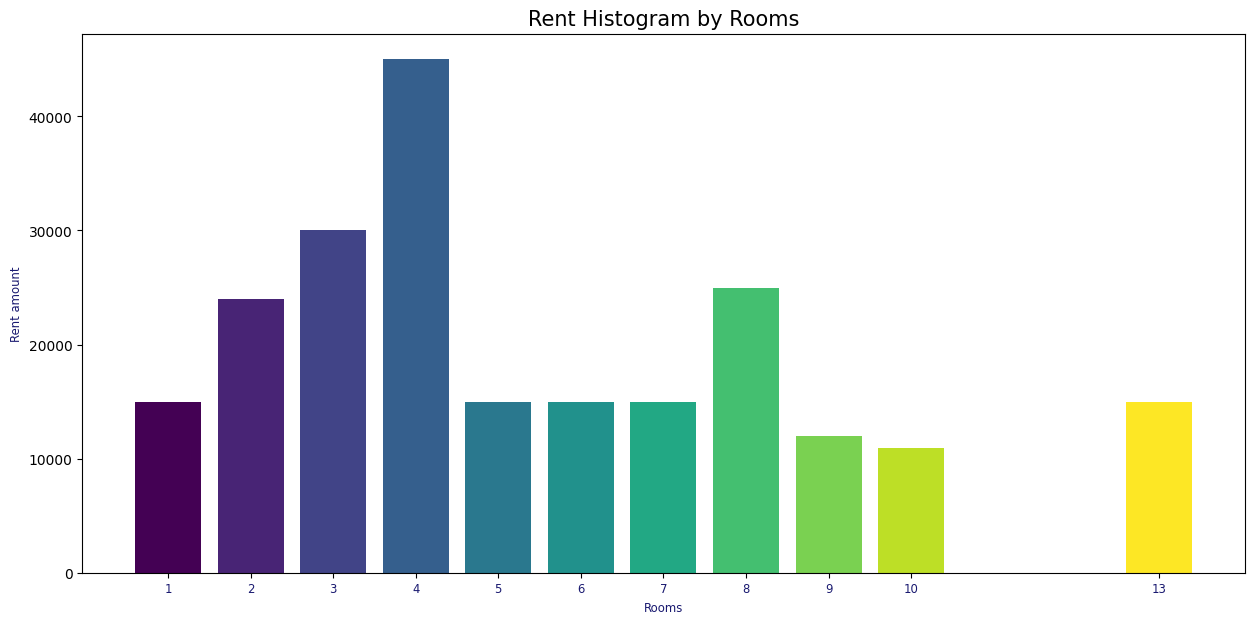

In [13]:
unique_rooms = sorted(df['rooms'].unique())

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_rooms)))

color_map = dict(zip(unique_rooms, colors))

plt.figure(figsize=(15, 7))

plt.bar(
    df['rooms'],
    df['rent amount'],
    color=[color_map[room] for room in df['rooms']]
)

plt.xticks(unique_rooms, labels=unique_rooms, fontsize="small", rotation=0, color="midnightblue")

plt.xlabel("Rooms", fontsize="small", color="midnightblue")
plt.ylabel("Rent amount", fontsize="small", color="midnightblue")
plt.title("Rent Histogram by Rooms", fontsize=15)

plt.show()

# **Вартість оренди житла залежно від міста**

In [14]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

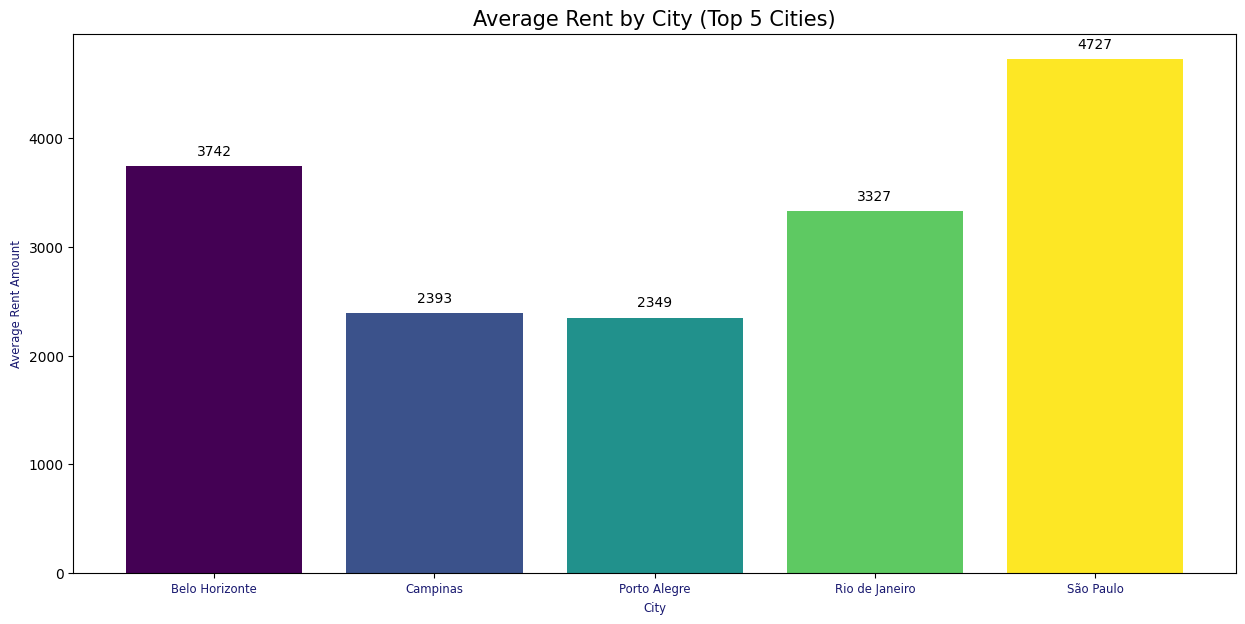

In [15]:
import numpy as np
import matplotlib.pyplot as plt

top_cities = df['city'].value_counts().head(5).index

filtered_df = df[df['city'].isin(top_cities)]

unique_city = sorted(filtered_df['city'].unique())

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_city)))

color_map = dict(zip(unique_city, colors))

plt.figure(figsize=(15, 7))

average_rent = filtered_df.groupby('city')['rent amount'].mean()

bars = plt.bar(
    average_rent.index,
    average_rent.values,
    color=[color_map[city] for city in average_rent.index]
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 100,
        f"{yval:.0f}",
        ha='center',
        fontsize=10,
        color="black"
    )

plt.xticks(fontsize="small", rotation=0, color="midnightblue")
plt.xlabel("City", fontsize="small", color="midnightblue")
plt.ylabel("Average Rent Amount", fontsize="small", color="midnightblue")
plt.title("Average Rent by City (Top 5 Cities)", fontsize=15)

plt.show()


In [16]:
df['area'].describe()

,area
count,10334.000000
mean,152.439423
std,545.875595
min,11.000000
25%,59.000000
50%,95.000000
75%,190.000000
max,46335.000000


In [17]:
print(df["city"].unique())
print(df["floor"].unique())
print(df["animal"].unique())
print(df["furniture"].unique())

['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
['acept' 'not acept']
['furnished' 'not furnished']


In [18]:
df.head()

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11


In [19]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

df[['animal', 'furniture', 'city']] = encoder.fit_transform(df[['animal', 'furniture', 'city']])
df

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,4.0,70,2,1,1,7,0.0,0.0,2065,3300,211,42
1,4.0,320,4,4,0,20,0.0,1.0,1200,4960,1750,63
2,2.0,80,1,1,1,6,0.0,1.0,1000,2800,0,41
3,2.0,51,2,1,0,2,0.0,1.0,270,1112,22,17
4,4.0,25,1,1,0,1,1.0,1.0,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2.0,63,2,1,1,5,1.0,0.0,402,1478,24,22
10688,4.0,285,4,4,4,17,0.0,1.0,3100,15000,973,191
10689,3.0,70,3,3,0,8,1.0,0.0,980,6000,332,78
10690,3.0,120,2,2,2,8,0.0,0.0,1585,12000,279,155


In [20]:
df['hoa'] = df['hoa'].apply(lambda x: np.nan if x == 0 else x)

# df['hoa'] = df['hoa'].replace(0, np.nan)
df['hoa']

,hoa
0,2065.0
1,1200.0
2,1000.0
3,270.0
4,NaN
...,...
10687,402.0
10688,3100.0
10689,980.0
10690,1585.0


In [21]:
df.loc[:, 'floor'] = df["floor"].str.replace("-", "0").astype(int)

In [22]:
df.head()

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,4.0,70,2,1,1,7,0.0,0.0,2065.0,3300,211,42
1,4.0,320,4,4,0,20,0.0,1.0,1200.0,4960,1750,63
2,2.0,80,1,1,1,6,0.0,1.0,1000.0,2800,0,41
3,2.0,51,2,1,0,2,0.0,1.0,270.0,1112,22,17
4,4.0,25,1,1,0,1,1.0,1.0,NaN,800,25,11


In [23]:
print(df["city"].unique())
print(df["floor"].unique())
print(df["animal"].unique())
print(df["furniture"].unique())

[4. 2. 3. 1. 0.]
[7 20 6 2 1 0 4 3 10 11 24 9 8 17 18 5 13 15 16 14 26 12 21 19 22 27 23 35
 25 46 28 29 301 51 32]
[0. 1.]
[0. 1.]


In [24]:
corr_matrix = df.corr()
corr_matrix

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
city,1.000000,-0.011079,-0.050135,0.087097,0.046532,0.111192,0.014973,-0.111979,0.005178,0.189965,0.037836,0.149550
area,-0.011079,1.000000,0.191251,0.224388,0.191421,-0.013849,-0.038712,-0.009249,0.012762,0.178228,0.038453,0.185652
rooms,-0.050135,0.191251,1.000000,0.730469,0.611634,-0.086562,-0.165436,0.075677,0.040068,0.536632,0.073539,0.560907
bathrooms,0.087097,0.224388,0.730469,1.000000,0.693952,0.000087,-0.114685,-0.023140,0.082335,0.665625,0.108083,0.673771
parking spaces,0.046532,0.191421,0.611634,0.693952,1.000000,-0.026981,-0.124266,0.003788,0.046802,0.573997,0.097159,0.593557
floor,0.111192,-0.013849,-0.086562,0.000087,-0.026981,1.000000,0.033619,-0.115293,0.008520,0.070565,0.012016,0.009841
animal,0.014973,-0.038712,-0.165436,-0.114685,-0.124266,0.033619,1.000000,-0.081020,0.015029,-0.064576,0.004238,-0.076535
furniture,-0.111979,-0.009249,0.075677,-0.023140,0.003788,-0.115293,-0.081020,1.000000,-0.003213,-0.166975,-0.001147,-0.144082
hoa,0.005178,0.012762,0.040068,0.082335,0.046802,0.008520,0.015029,-0.003213,1.000000,0.072101,0.011710,0.070770
rent amount,0.189965,0.178228,0.536632,0.665625,0.573997,0.070565,-0.064576,-0.166975,0.072101,1.000000,0.106679,0.987203


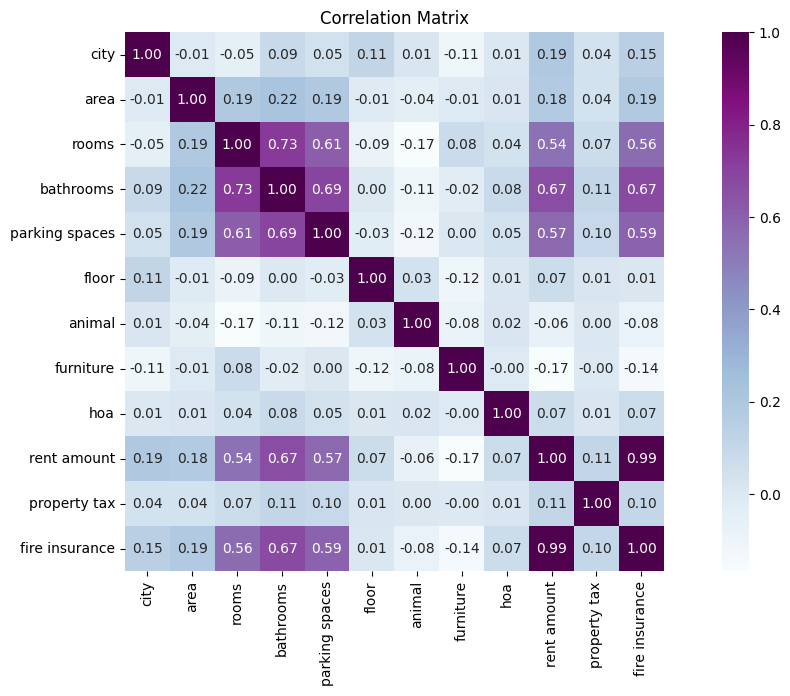

In [25]:
plt.figure(figsize=(15, 7))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt='.2f', square=True, cbar=True)
plt.show()

In [26]:
corr_rent_amount = corr_matrix['rent amount'].sort_values(ascending=False)
corr_rent_amount

,rent amount
rent amount,1.000000
fire insurance,0.987203
bathrooms,0.665625
parking spaces,0.573997
rooms,0.536632
city,0.189965
area,0.178228
property tax,0.106679
hoa,0.072101
floor,0.070565


<ipython-input-27-393b3bc63cc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")


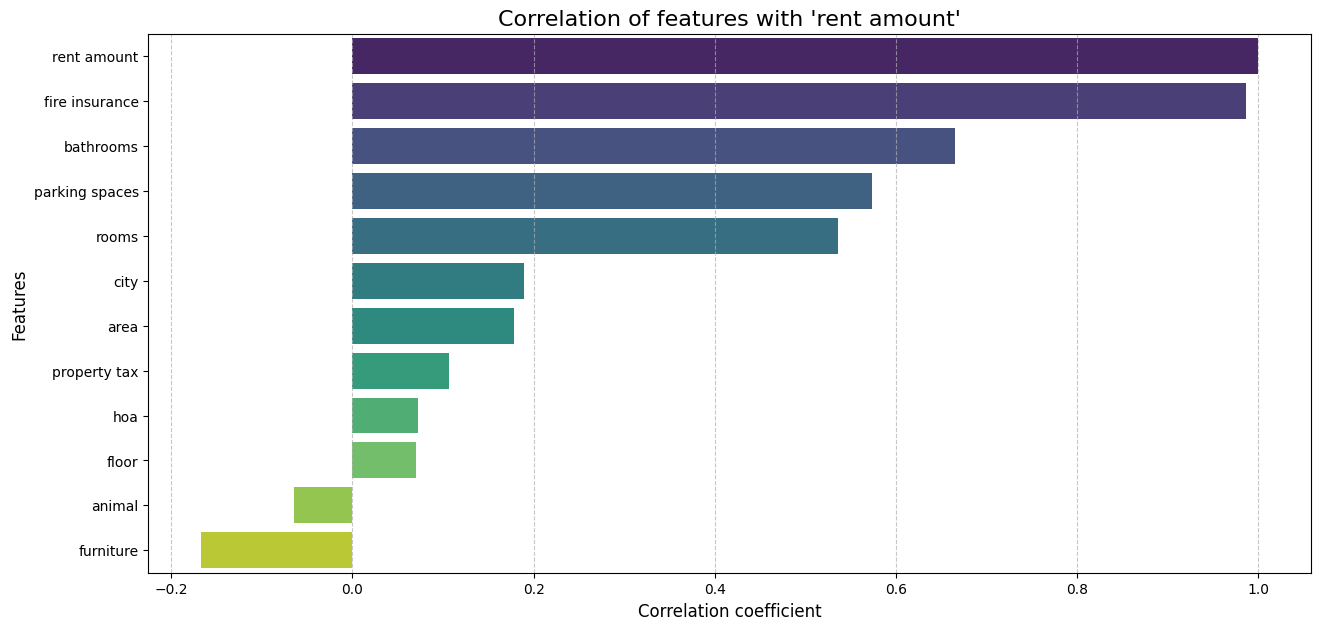

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")

plt.title("Correlation of features with 'rent amount'", fontsize=16)
plt.xlabel("Correlation coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

# ***Висновки з кореляційного аналізу для rent amount:***

***Сильний позитивний зв'язок***:



*   **fire insurance (0.987)**: Дуже сильна кореляція з орендною платою. Це очікувано, оскільки страхова сума може бути пропорційною орендній платі.

*  **bathrooms (0.666)**: Наявність більшої кількості ванних кімнат пов’язана з вищою орендною платою. Це вказує на те, що житлові площі з більшою кількістю зручностей дорожчі.

*  **parking spaces (0.574)**: Житло з паркомісцями має вищу орендну плату, оскільки це часто ознака елітності чи зручності.

*  **rooms (0.537)**: Більша кількість кімнат також асоціюється з вищою орендною платою, що відповідає логіці більших площ.

***Слабкий позитивний зв'язок***:

*  **city (0.190)**: Місто впливає на орендну плату, але залежність слабка. Це може бути пов’язано з різними умовами у кожному місті.

* **area (0.178)**: Площа має помірну позитивну кореляцію, але не є ключовим чинником. Це може свідчити про те, що більша площа не завжди означає значно більшу плату за оренду.

* **property tax (0.107)**: Податок на нерухомість має слабкий вплив. Він, ймовірно, враховується власниками нерухомості, але не є прямим показником орендної плати.

* **hoa (0.072)**: Невеликий зв’язок із платою за асоціацію власників будинків. Це може впливати лише на певні типи житла (наприклад, квартири у кондомініумах).

***Майже нейтральний вплив:***

* **floor (0.071)**: Поверх має дуже слабкий вплив на орендну плату, що може залежати від міста та архітектури будівель.

***Негативний зв'язок:***

* **animal (-0.065)**: Наявність дозволу на утримання тварин має слабкий негативний вплив. Це може свідчити про те, що будинки, які дозволяють тварин, можуть бути менш дорогими.

* **furniture (-0.167)**: Мебльованість має помітний негативний зв'язок. Це може вказувати на те, що немебльоване житло орендується за вищими цінами, оскільки такі житлові приміщення зазвичай мають більшу площу або є більш довгостроковими.


# ***Загальний висновок:***

***Орендна плата в основному залежить від ключових характеристик житла:***


*   зручності (ванні кімнати, кімнати, паркомісця) мають найбільший вплив;

*   локація (місто) та площа мають менший, але все ж значний вплив;

*   негативний зв'язок із мебльованістю і дозволом для тварин може вказувати на перевагу немебльованого житла серед орендарів, готових платити більше.

Ці дані можуть бути використані для створення моделі прогнозування орендної плати та для визначення факторів, які слід враховувати при купівлі або оренді житла.

In [28]:
df

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,4.0,70,2,1,1,7,0.0,0.0,2065.0,3300,211,42
1,4.0,320,4,4,0,20,0.0,1.0,1200.0,4960,1750,63
2,2.0,80,1,1,1,6,0.0,1.0,1000.0,2800,0,41
3,2.0,51,2,1,0,2,0.0,1.0,270.0,1112,22,17
4,4.0,25,1,1,0,1,1.0,1.0,NaN,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2.0,63,2,1,1,5,1.0,0.0,402.0,1478,24,22
10688,4.0,285,4,4,4,17,0.0,1.0,3100.0,15000,973,191
10689,3.0,70,3,3,0,8,1.0,0.0,980.0,6000,332,78
10690,3.0,120,2,2,2,8,0.0,0.0,1585.0,12000,279,155


In [29]:
# X = df.drop(['city', 'rooms', 'bathrooms', 'parking spaces', 'property tax', 'fire insurance',
#         'furniture'], axis=1)
# y = df['rent amount']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
